In [ ]:
#Creating DB engine(Sqlite), Ingestion of dataframe into DB(Sql Engine), to read files from particular directory, Setting up logging handler and logging of data
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(filename='/content/ingestiondb.log', level= logging.DEBUG,format='%(asctime)s -%(levelname)s -%(message)s',filemode='a')
logging.debug("Logging setup complete.")

engine=create_engine('sqlite:///inventory.db')

def ingest_db(df,table_name,engine):
  '''This function ingests data frames/data to DB server(EngineName)'''
  df.to_sql(table_name, con=engine, if_exists='replace', index=False)#Coverting/Ingesting dataframe to sql engine(Tablename, engine,incase of continuous
                                                                       #data use append instead of if_exists,Index=F do not want indexing)
def load_raw_data():
  '''This function loads csv's as dataframes and ingest into DB'''
  start= time.time()
  for fileindir in os.listdir('/content/'): #To read files from particular directory os.listdir(path of directory)
    if '.csv' in fileindir:                             #To categorize filenames which has .csv at the end
      df=pd.read_csv('/content/'+fileindir) #To read csv files (path + filename)
      print(df.shape)
      logging.info(f'Ingesting {fileindir} in db')
      ingest_db(df,fileindir[:-4],engine)              #Calling Ingestion function(using slicing to remove .csv from the end of filename to create tablename)
      end=time.time()
      total_time=(end-start)/60
      logging.info(f'------Ingestion complete for {fileindir} in db-----')
      logging.info(f'\nTotal time taken is {total_time} minutes')

if __name__=='__main__':
  load_raw_data()

# Basic code syntax to practice/remember
# import pandas as pd
# from sqlalchemy import create_engine

# # Create a DataFrame
# data = {'name': ['Alice', 'Bob'], 'age': [25, 30]}
# df = pd.DataFrame(data)

# # Create a database connection (SQLite here)
# engine = create_engine('sqlite:///people.db')

# # Write the DataFrame to a SQL table named "users"
# df.to_sql('users', con=engine, if_exists='replace', index=False)
# This will:

# Create a table called users in people.db

# Insert the DataFrame rows into it

# Replace any existing table with the same name

# ⚠️ if_exists options

# 'fail' → Raises an error if the table exists (default)

# 'replace' → Drops the table and creates a new one

# 'append' → Adds rows to the existing table

(224489, 9)
(206529, 9)
(5543, 10)
(12261, 9)
(10692, 18)
(2372474, 16)
(12825363, 14)


In [5]:
#EDA using Sqlite3
import pandas as pd
import sqlite3
import os
conn=sqlite3.connect('/content/inventory.db')  #Establishing DB connection
tables =pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table"',conn) #Checking tables in database
tables
pd.read_sql('select count(*) from purchases', conn) #To find specific count of records in the table
for table in tables['name']:  #To print count of records in each table
  print('-'*50,f'{table}','-'*50)
  print('count of records:',pd.read_sql(f"select count (*) as count from {table}",conn)['count'].values[0])
  display(pd.read_sql(f"select * from {table} limit 5",conn))

-------------------------------------------------- vendor_sales_summary10 --------------------------------------------------
count of records: 0


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio


-------------------------------------------------- end_inventory --------------------------------------------------
count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- begin_inventory --------------------------------------------------
count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- vendor_invoice --------------------------------------------------
count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- purchase_prices --------------------------------------------------
count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
count of records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


-------------------------------------------------- purchases --------------------------------------------------
count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- sales --------------------------------------------------
count of records: 0


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName


In [6]:
purchases= pd.read_sql_query("select * from purchases where VendorNumber= 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [7]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber= 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [8]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNumber= 4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [9]:
sales = pd.read_sql_query("""SELECT * FROM sales where VendorNo = 4466""", conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName


In [10]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [11]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [12]:
vendor_invoice['PONumber'].nunique()

55

In [13]:
vendor_invoice.shape

(55, 10)

In [14]:
sales.groupby('Brand')[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,


In [ ]:
'''Purchases table contain acutual purchase data, including date of purchase, products(brand) purchased by vendors, the amount paid in dollars and
the quantity.
Purchase prize column is derived from purchase_prizes table, which provides product wise actual and purchase prozes.
The combination od vendor and brand is unique in this table.
The vendor invoice table is aggregates data from purchases table summarizing quantity and dollar amounts, along with an additional column for freight.
This table maintains uniqueness based on vendor and Po number.
The Sales tables captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price and revenue earned.

As the data we need for analysis is distributed in different tables, we need to create a summary table containing
1.Purchase transactions made by vendors
2.Sales transaction data
3.Freight cost for each vendor
4.Actual product prices from vendors'''


In [15]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [16]:
freight_summary=pd.read_sql("select VendorNumber,SUM(Freight) as FreightCost From vendor_invoice Group By VendorNumber",conn)
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [17]:
pd.read_sql("""Select p.VendorNumber,p.VendorName,p.Brand,p.PurchasePrice,pp.Volume,pp.Price as ActualPrice,SUM(p.Quantity) as TotalPurchaseQuantity,
Sum(p.Dollars) as TotalPurchaseDollars From purchases p Join purchase_prices pp ON p.Brand = pp.Brand
where p.PurchasePrice > 0 Group BY p.VendorNumber,p.VendorName,p.Brand ORDER BY TotalPurchaseDollars """, conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [18]:
pd.read_sql("""select VendorNo, Brand, SUM(SalesDollars) as TotalSalesDollars,SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity, SUM(ExciseTax) as TotalExciseTax From Sales
Group By VendorNo, Brand Order by TotalSalesPrice""", conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax


In [18]:
# import time
# start=time.time()
# finaltable=pd.read_sql_query("""Select pp.VendorNumber, pp.Brand, pp.Price as ActualPrice, pp.PurchasePrice,
# SUM(s.SalesQuantity) AS TotalSalesQuantity,
# SUM(s.SalesDollars) AS TotalSalesDollars,
# SUM(s.SalesPrice) AS TotalSalesPrice,
# SUM(s.ExciseTax) AS TotalExciseTax,
# SUM(vi.Quantity) AS TotalPurchaseQuantity,
# Sum(vi.Dollars) AS TotalPurchaseDollars,
# SUM(vi.Freight) AS TotalFreightCost
# From purchase_prices pp
# JOIN sales s
#   ON pp.VendorNumber = s.VendorNo
#   AND pp.Brand = s.Brand
# JOIN vendor_invoice vi
#   ON pp.VendorNumber = vi.VendorNumber
# GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice """,conn)
# end=time.time()


In [19]:
#optimised query
vendor_sales_summary = pd.read_sql_query(""" WITH FreightSummary AS (
  SELECT
  VendorNumber,
  SUM(Freight) as FreightCost
  FROM vendor_invoice
  GROUP BY VendorNumber
),
PurchaseSummary AS(
  SELECT
  p.VendorNumber,
  p.VendorName,
  p.Brand,
  p.Description,
  p.PurchasePrice,
  pp.Price as ActualPrice,
  pp.Volume,
  SUM(p.Quantity) as TotalPurchaseQuantity,
  SUM(p.Dollars) as TotalPurchaseDollars
  From purchases p
  Join purchase_prices pp
  ON p.Brand = pp.Brand
  Group BY p.VendorNumber,p.VendorName,p.Brand,p.Description,p.PurchasePrice,pp.Price,pp.Volume
),
SalesSummary AS (
  SELECT
  VendorNo,
  Brand,
  SUM(SalesQuantity) AS TotalSalesQuantity,
  SUM(SalesDollars) AS TotalSalesDollars,
  SUM(SalesPrice) AS TotalSalesPrice,
  SUM(ExciseTax) AS TotalExciseTax
  FROM sales
  GROUP BY VendorNo, Brand
  )
  SELECT
  ps.VendorNumber,
  ps.VendorName,
  ps.Brand,
  ps.Description,
  ps.PurchasePrice,
  ps.ActualPrice,
  ps.Volume,
  ps.TotalPurchaseQuantity,
  ps.TotalPurchaseDollars,
  ss.TotalSalesQuantity,
  ss.TotalSalesDollars,
  ss.TotalSalesPrice,
  ss.TotalExciseTax,
  fs.FreightCost
  FROM PurchaseSummary ps
  LEFT JOIN SalesSummary ss
  ON ps.VendorNumber = ss.VendorNo
  AND ps.Brand = ss.Brand
  LEFT JOIN FreightSummary fs
  ON ps.VendorNumber = fs.VendorNumber
  ORDER BY ps.TotalPurchaseDollars DESC""",conn)
vendor_sales_summary
#This query generates a vendor wise sales and purchase summary which is valuable for:
# Performance Optimization:
# The query involves heavy joins and aggregations on large datasets like sales and purchases.
# Storing the pre aggregated results avoids repeated expensive computations.
# Helps in analysing sales, purchases and procing for different vendors and brands.
# Future benefits for storing this data for faster Dashboarding and reporting
# Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary table.

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,None,None,None,None,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,None,None,None,None,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,None,None,None,None,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,None,None,None,None,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,None,None,None,None,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,None,None,None,None,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,None,None,None,None,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,None,None,None,None,257032.07
10691,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50,1,0.71,None,None,None,None,38994.78


In [20]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,object


In [21]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,10693


In [22]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [23]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Concannon Glen Ellen Wh Zin',
       'The Club Strawbry Margarita', 'The Macallan Double Cask 12'],
      dtype=object)

In [24]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')
vendor_sales_summary.fillna(0, inplace=True)
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()
vendor_sales_summary['GrossProfit']= vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary
vendor_sales_summary['GrossProfit'].min()
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary.dtypes

/tmp/ipython-input-2243625394.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vendor_sales_summary.fillna(0, inplace=True)


,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,float64
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,int64


In [27]:
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE vendor_sales_summary101(
  VendorNumber REAL,
  VendorName TEXT,
  Brand INTEGER,
  Description TEXT,
  PurchasePrice REAL,
  ActualPrice REAL,
  Volume REAL,
  TotalPurchaseQuantity REAL,
  TotalPurchaseDollars REAL,
  TotalSalesQuantity REAL,
  TotalSalesDollars REAL,
  TotalSalesPrice REAL,
  TotalExciseTax REAL,
  FreightCost REAL,
  GrossProfit REAL,
  ProfitMargin REAL,
  StockTurnover REAL,
  SalestoPurchaseRatio REAL,
  PRIMARY KEY (VendorNumber, Brand)
);
""")
vendor_sales_summary101=pd.read_sql_query("SELECT * FROM vendor_sales_summary101",conn)

vendor_sales_summary101.to_sql('vendor_sales_summary101',conn, if_exists = 'replace' , index= False)

0

In [28]:
pd.read_sql_query("""SELECT*FROM vendor_sales_summary10""",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio


In [30]:
vendor_sales_summary101.to_sql('vendor_sales_summary101',conn, if_exists = 'replace' , index= False)

0

In [32]:
import sqlite3
import pandas as pd
import logging
from ingestion_db import ingest_db   # make sure this exists

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(conn):
    query = """
    WITH FreightSummary AS (
        SELECT VendorNumber, VendorName, SUM(Freight) AS FreightCost
        FROM vendor_invoice
        GROUP BY VendorNumber, VendorName
    ),
    PurchaseSummary AS (
        SELECT
            p.VendorNumber, p.VendorName, p.Brand, p.Description,
            p.PurchasePrice, pp.Price AS ActualPrice, pp.Volume,
            SUM(p.Quantity) AS TotalPurchaseQuantity,
            SUM(p.Quantity * p.PurchasePrice) AS TotalPurchaseDollars
        FROM purchases p
        JOIN purchase_prices pp ON p.Brand = pp.Brand
        WHERE p.PurchasePrice > 0
        GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description,
                 p.PurchasePrice, pp.Price, pp.Volume
    ),
    SalesSummary AS (
        SELECT VendorNo, Brand,
               SUM(SalesQuantity) AS TotalSalesQuantity,
               SUM(SalesDollars) AS TotalSalesDollars,
               SUM(SalesPrice) AS TotalSalesPrice,
               SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY VendorNo, Brand
    )
    SELECT
        ps.VendorNumber, ps.VendorName, ps.Brand, ps.Description,
        ps.PurchasePrice, ps.ActualPrice, ps.Volume,
        ps.TotalPurchaseQuantity, ps.TotalPurchaseDollars,
        ss.TotalSalesQuantity, ss.TotalSalesPrice,
        ss.TotalSalesDollars, ss.TotalExciseTax, fs.FreightCost
    FROM PurchaseSummary ps
    LEFT JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """
    return pd.read_sql_query(query, conn)

def clean_data(df):
    df['Volume'] = df['Volume'].astype(float)
    df.fillna(0, inplace=True)
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = df.apply(
        lambda x: (x['GrossProfit'] / x['TotalSalesDollars'] * 100)
        if x['TotalSalesDollars'] != 0 else 0, axis=1)
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalesToPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']
    return df

if __name__ == '__main__':
    conn = sqlite3.connect('/content/inventory.db')
    logging.info('Creating Vendor Summary Table....')
    summary_df = create_vendor_summary(conn)
    logging.info(summary_df.head())
    logging.info('Cleaning Data....')
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())
    logging.info('Ingesting data....')
    ingest_db(clean_df, 'vendor_sales_summary', conn)
    logging.info('----------Completed----------')


/tmp/ipython-input-1347806459.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [34]:
# Creating Database Connection
 conn = sqlite3.connect('inventory.db')

# Fetching vendor summary data
df = pd.read_sql_query("SELECT*From vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Exploratary Data Analysis
1. Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

2. In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [35]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


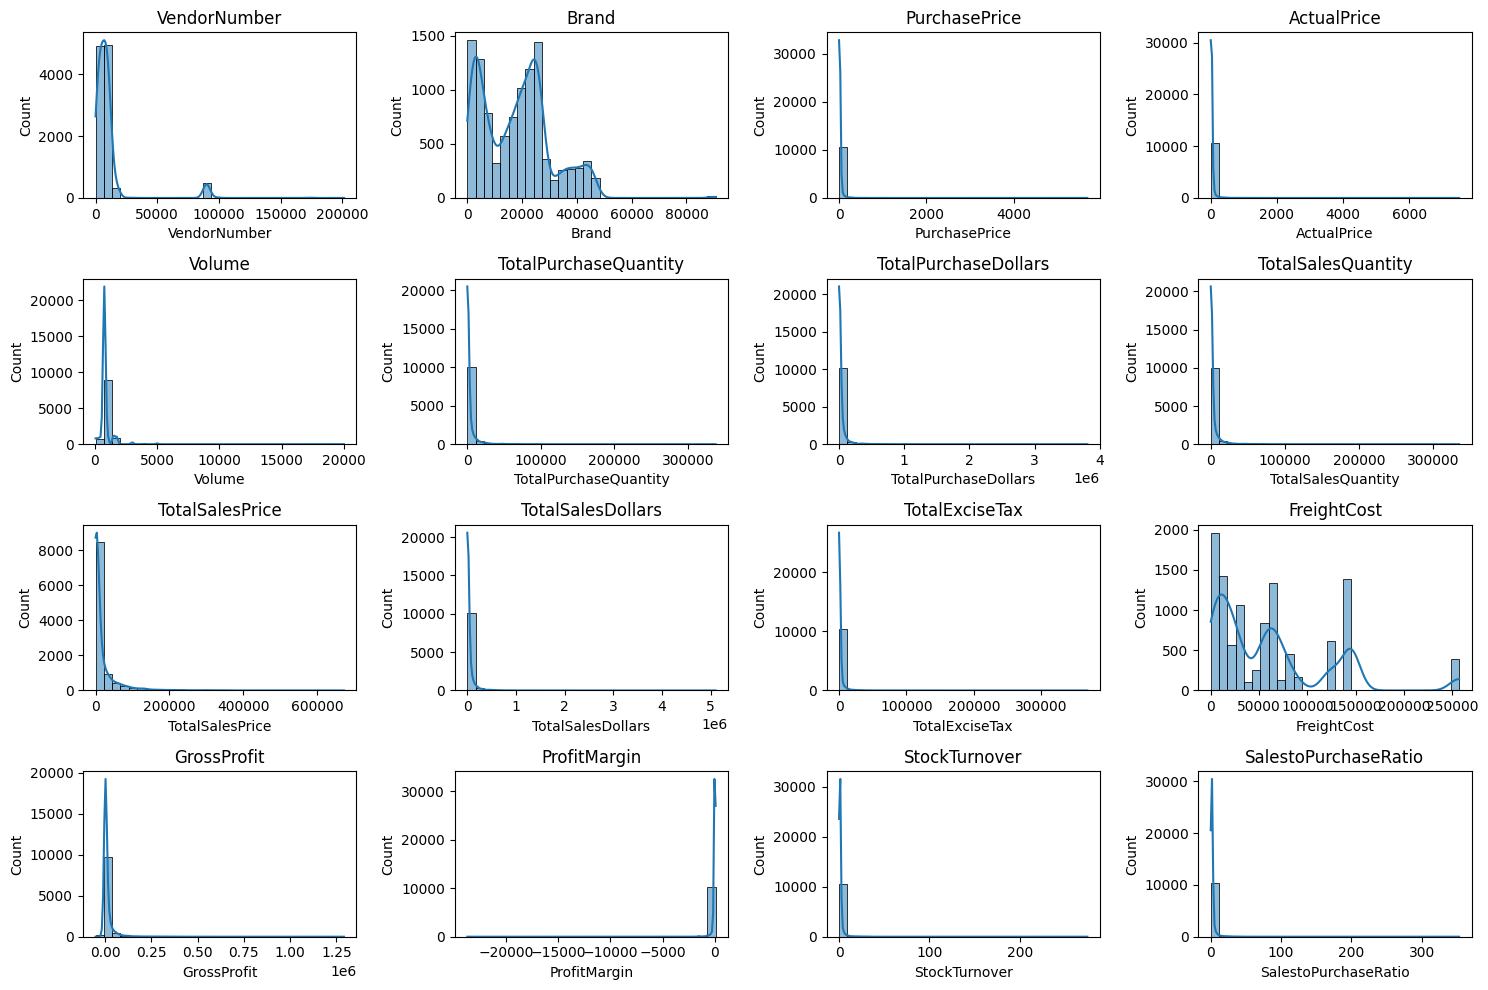

In [37]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

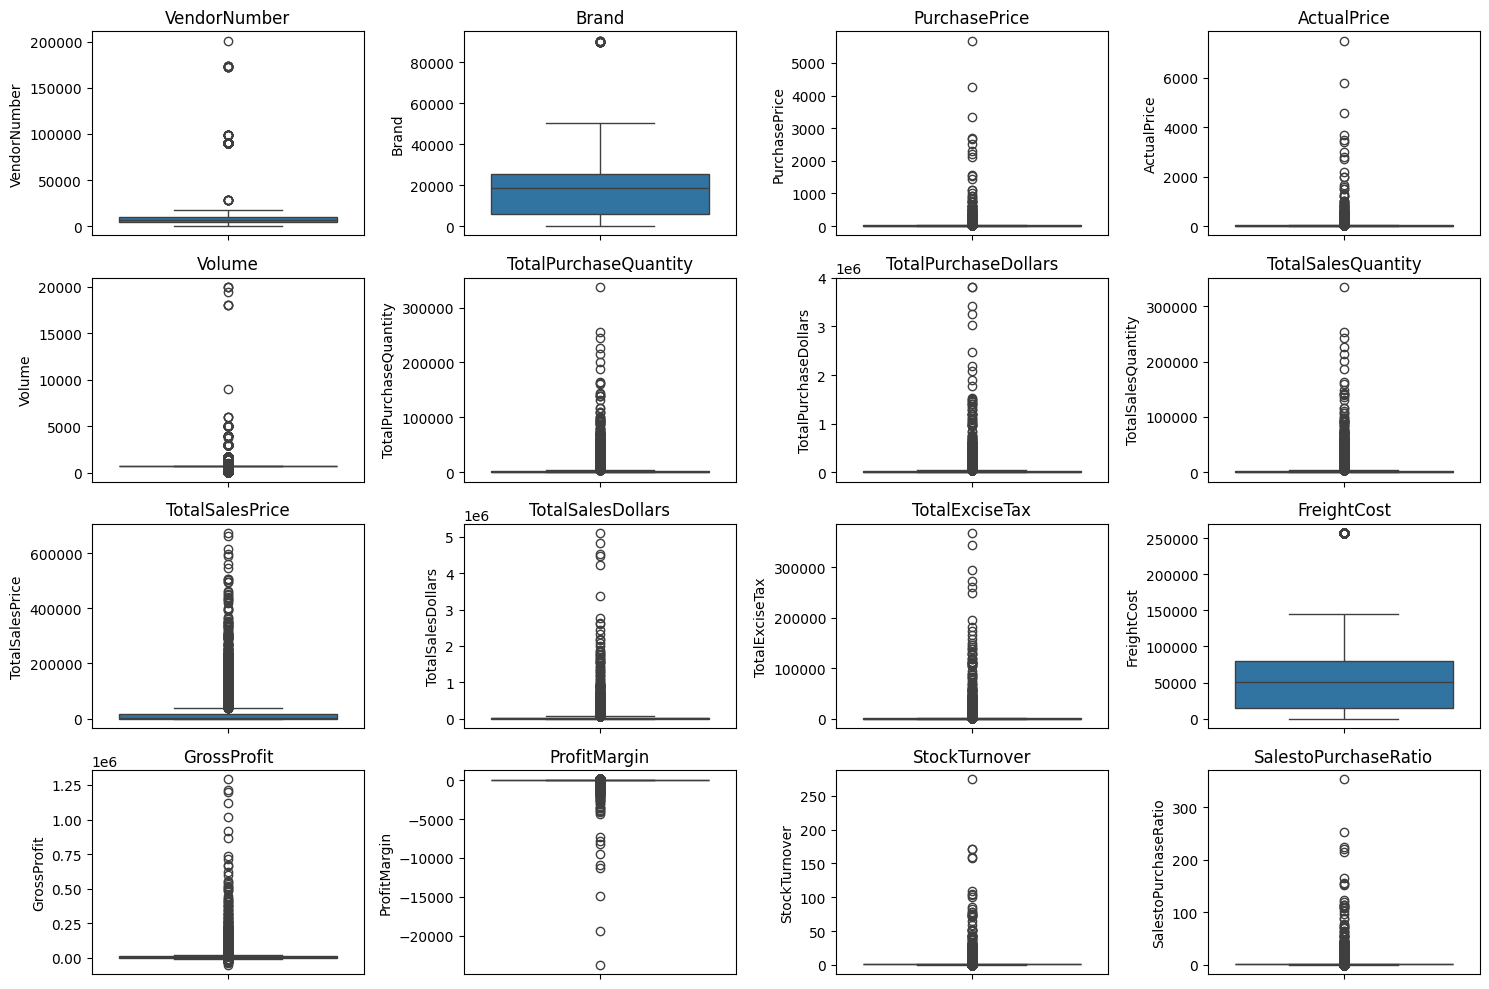

In [38]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:
Negative & Zero Values:
• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
• Profit Margin: Has a minimum of -00, which suggests cases where revenue is zero or even lower than costs.
• Total Sales Quantity & Sales Dollars: Minimum values are O, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
Outliers Indicated by High Standard Deviations:
•Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
• Stock Turnover: Ranges from O to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [39]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query(
    """SELECT*
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
    """,conn
)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388


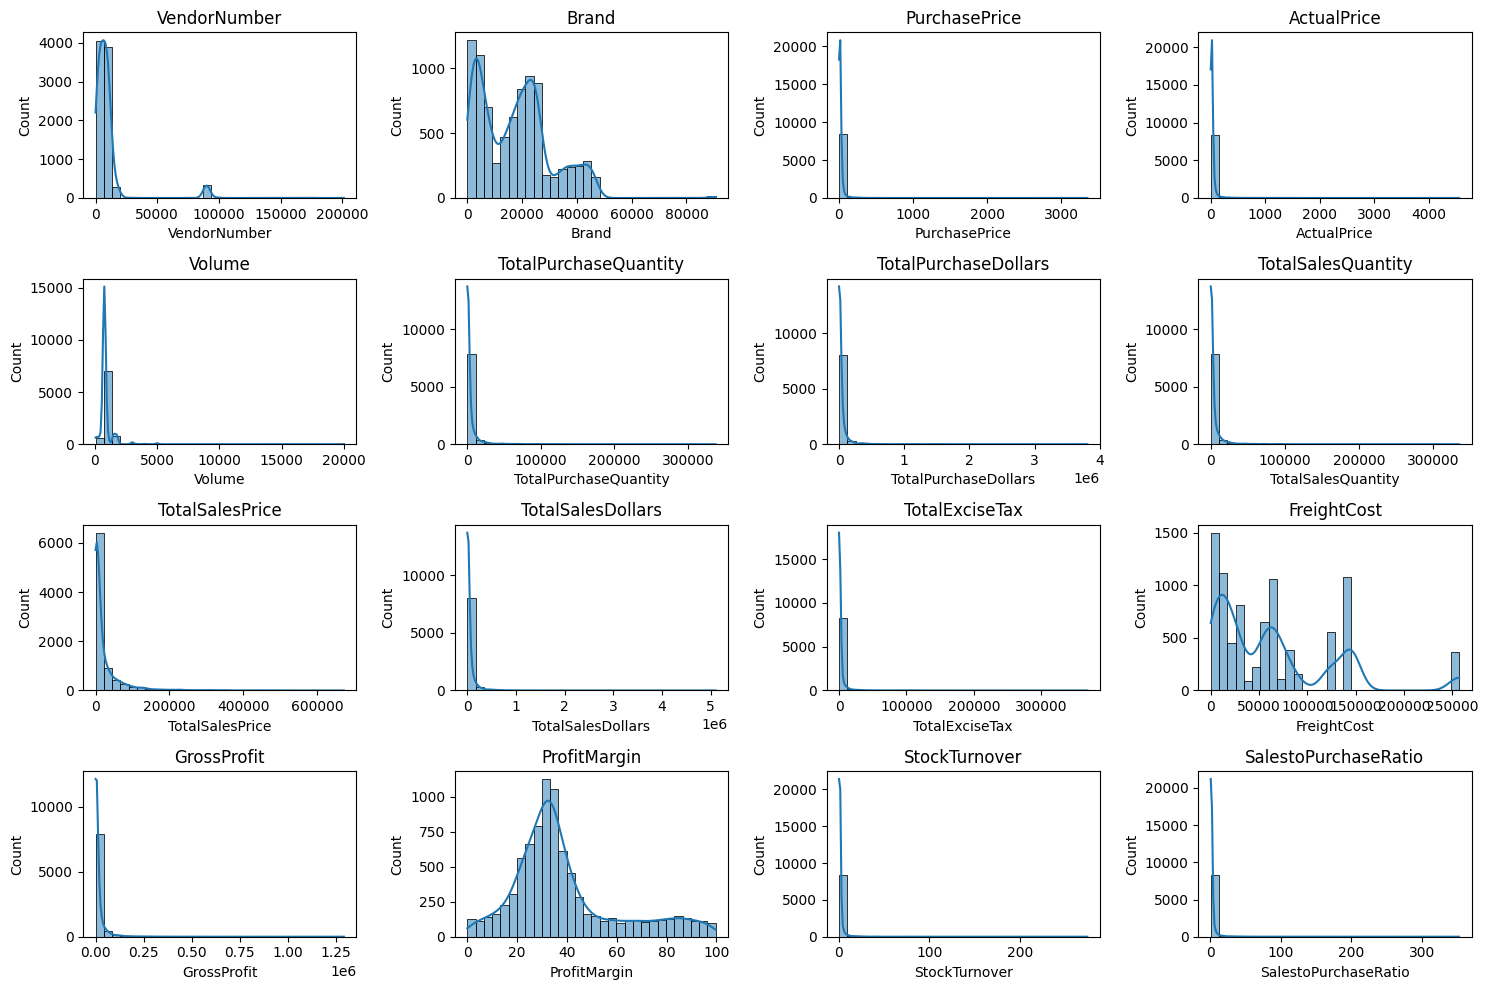

In [40]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

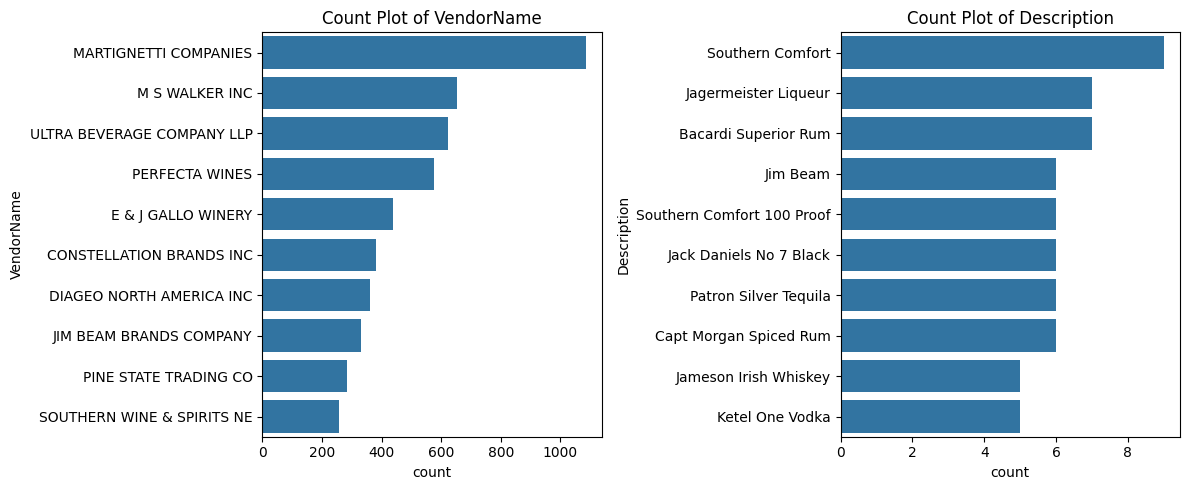

In [41]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

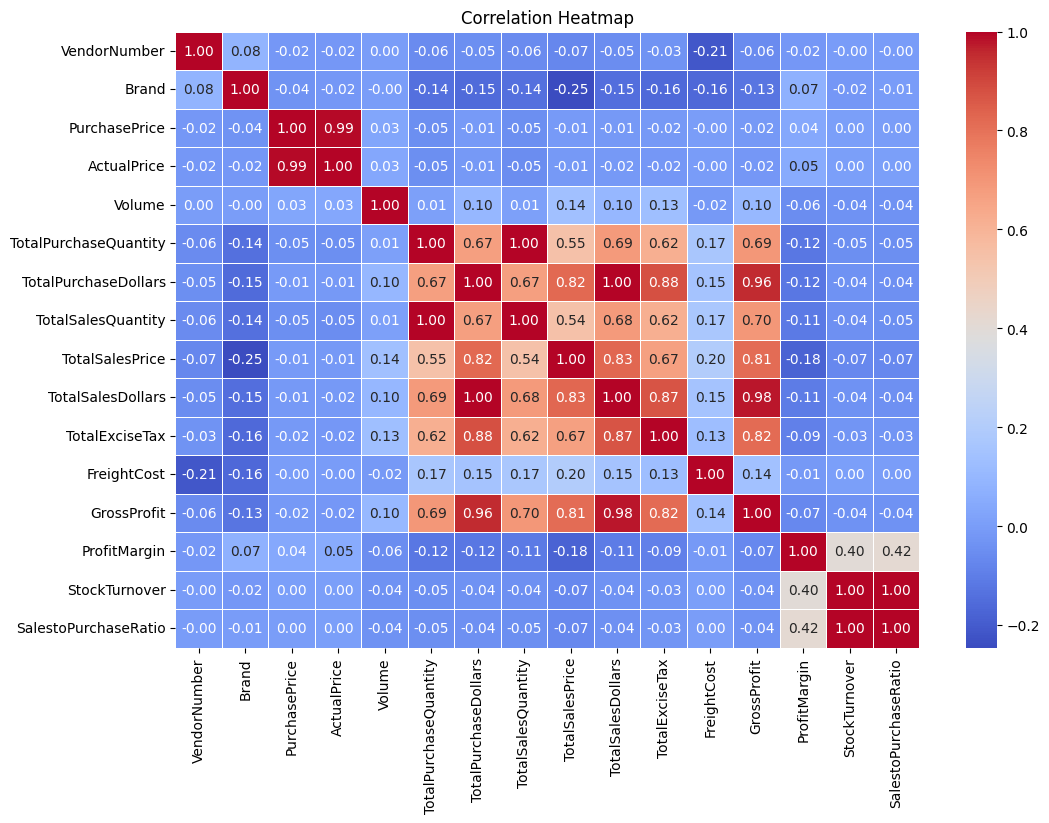

In [42]:
# Correlation Heatmap
plt.figure(figsize = (12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights
• PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit. • Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures. • StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

Data Analysis
Idetify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [48]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()
Low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
High_sales_threshold = brand_performance['ProfitMargin'].quantile(0.85)
Low_sales_threshold
np.float64(560.299)
High_sales_threshold

np.float64(64.97017552750113)

In [49]:
# Filter brands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= Low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= High_sales_threshold)
]

print('Brands with Low Sales Sales but High Profit Margins')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales Sales but High Profit Margins


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [50]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] #for Better visualization

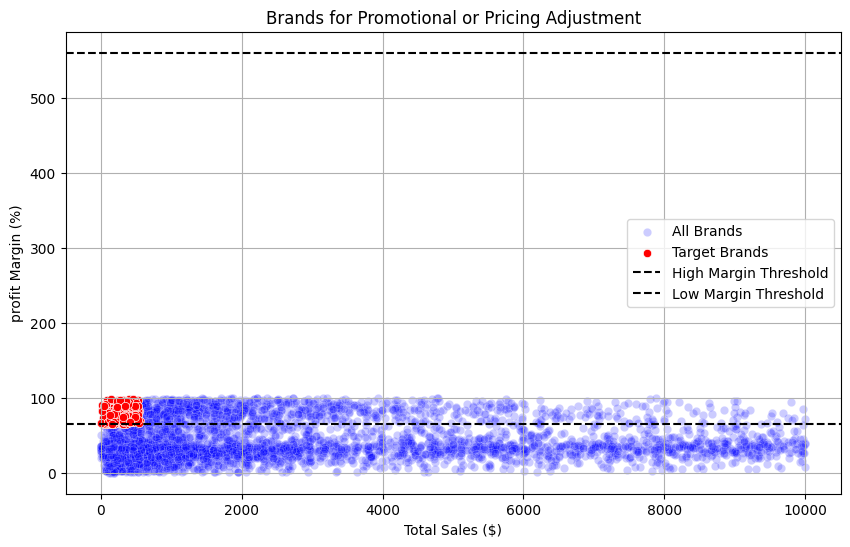

In [51]:
plt.figure(figsize =(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="Blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="Red", label="Target Brands")

plt.axhline(High_sales_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axhline(Low_sales_threshold, linestyle='--', color='black', label="Low Margin Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [53]:
# Top Vendors & Brands by sales Performance
top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67990099.42
MARTIGNETTI COMPANIES,39330359.36
PERNOD RICARD USA,32063196.19
JIM BEAM BRANDS COMPANY,31423020.46
BACARDI USA INC,24854817.14
CONSTELLATION BRANDS INC,24218745.65
E & J GALLO WINERY,18399899.46
BROWN-FORMAN CORP,18247230.65
ULTRA BEVERAGE COMPANY LLP,16502544.31
